In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from SAMPEX_functions import read_counts as read
from SAMPEX_functions import mb_finder, mb_magnitude, iso_calculator
import pandas as pd

# reading in electron counts file: day ### of year ####
file = 'hhrr1993256.txt'
t, r1, r2, r3, r4 = read(file)

In [2]:
# find microburst times and N_100, SSD1, SSD4 counts using algorithm
t_microburst, N_100_microburst, r1_microburst, r4_microburst, mb_index, MB_mask, N_100, A_500 = mb_finder(t, r1, r2, r3, r4)

In [3]:
# calculation of B_3 bin percentiles
y_microburst, B_3_microburst, B_3 = mb_magnitude(N_100, N_100_microburst, A_500)

In [4]:
mlist = ''
for tm in t_microburst:
    mlist = mlist + ', ' + str(tm)

#print(mlist)

In [5]:
print(t[r4 == np.max(r4)][0])

29265.2


In [6]:
# counts units = [counts/100ms]
def counts2flux(counts):
    ms2s = 1/1000
    geo_factor = 15
    flux = (counts/100)*(1/ms2s)*(1/geo_factor)
    
    return flux

333.3333333333333


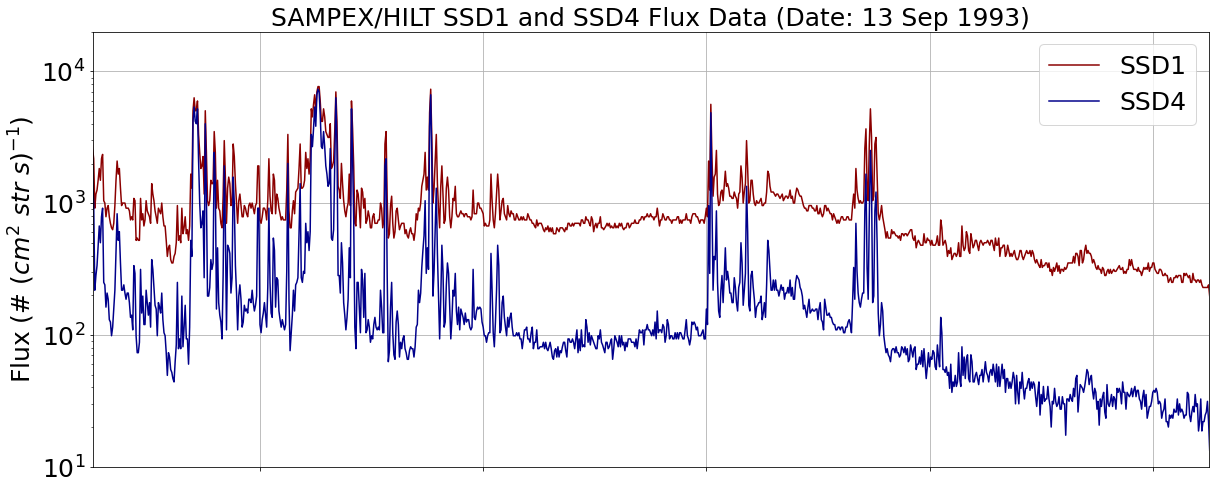

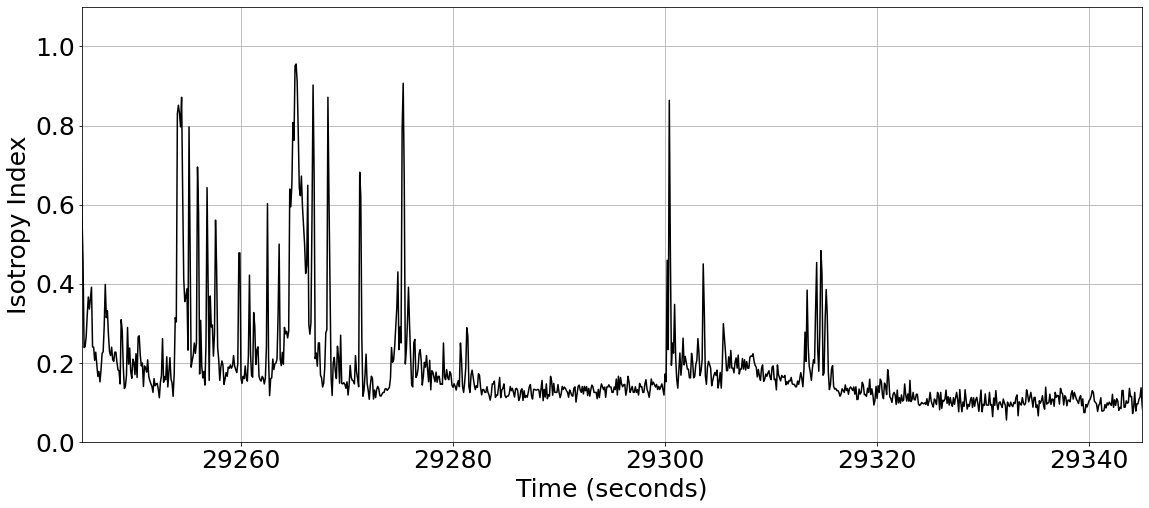

In [7]:
# plot microburst electron counts and baseline vs time
i = 550            # focus microburst
#middle_point = t_microburst[i]
middle_point = 29295
plotrange = 50     # data range around microburst

plt.figure(figsize = (20,8))
plt.title('SAMPEX/HILT SSD1 and SSD4 Flux Data (Date: 13 Sep 1993)', fontsize = 25)
plt.semilogy(t, counts2flux(r1), 'darkred', t, counts2flux(r4), 'darkblue')  # isotropy check
plt.ylabel('Flux (# $(cm^2$ $str$ $s)^{-1}$)', fontsize = 25)

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])

plt.yticks(fontsize = 25)
plt.xlim(middle_point-plotrange, middle_point+plotrange)
plt.ylim(10, 2e4)
plt.grid(True)
plt.legend(['SSD1', 'SSD4'], fontsize=25)
plt.show()

# plot isotropy index
iso = iso_calculator(r1, r4)

plt.figure(figsize = (19,8))
plt.plot(t, iso, 'k')  # isotropy check
plt.xlabel('Time (seconds)', fontsize = 25)
plt.ylabel('Isotropy Index', fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlim(middle_point-plotrange, middle_point+plotrange)
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

In [8]:
# calculation of the isotropy indices of electron counts
iso_indices = []        # for data analysis purposes
iso_indices_plot = []   # for plotting purposes

for i, ii in zip(r1_microburst, r4_microburst):
    if ii >= 20 and i >= 20:
        if  ii != 0 and ii > i:
            iso_index = i/ii
            iso_indices.append(iso_index)
            iso_indices_plot.append(iso_index)
        elif  i != 0 and i > ii:
            iso_index = ii/i
            iso_indices.append(iso_index)
            iso_indices_plot.append(iso_index)
        elif  ii == i:
            iso_index = 1
            iso_indices.append(iso_index)
            iso_indices_plot.append(iso_index)
    else:
        # when counts are too low, they do not contribute to the isotropy day-average isotropy index
        iso_index = 0
        iso_indices_plot.append(iso_index)

iso_indices = np.array(iso_indices)
iso_indices_plot = np.array(iso_indices_plot)

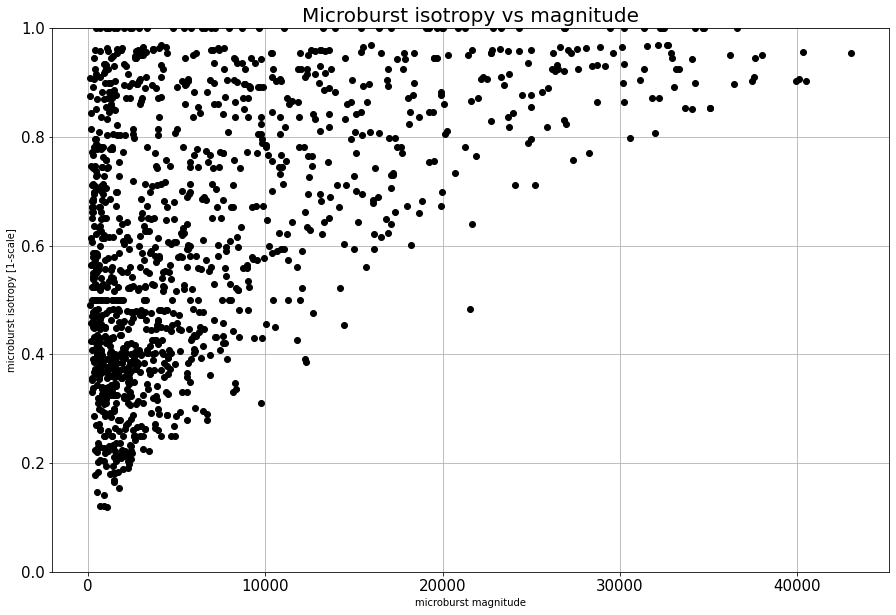

In [9]:
# plot microburst isotropy vs magnitude
i = 400
plotrange = 50000

plt.figure(figsize = (15,10))
plt.title('Microburst isotropy vs magnitude', fontsize = 20)
plt.plot(y_microburst, iso_indices_plot, 'ko')
plt.xlabel('microburst magnitude', fontsize = 10)
plt.ylabel('microburst isotropy [1-scale]', fontsize = 10)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(0, 1)
#plt.xlim(t_microburst[i]-plotrange, t_microburst[i]+plotrange)
plt.grid(True)
plt.show()

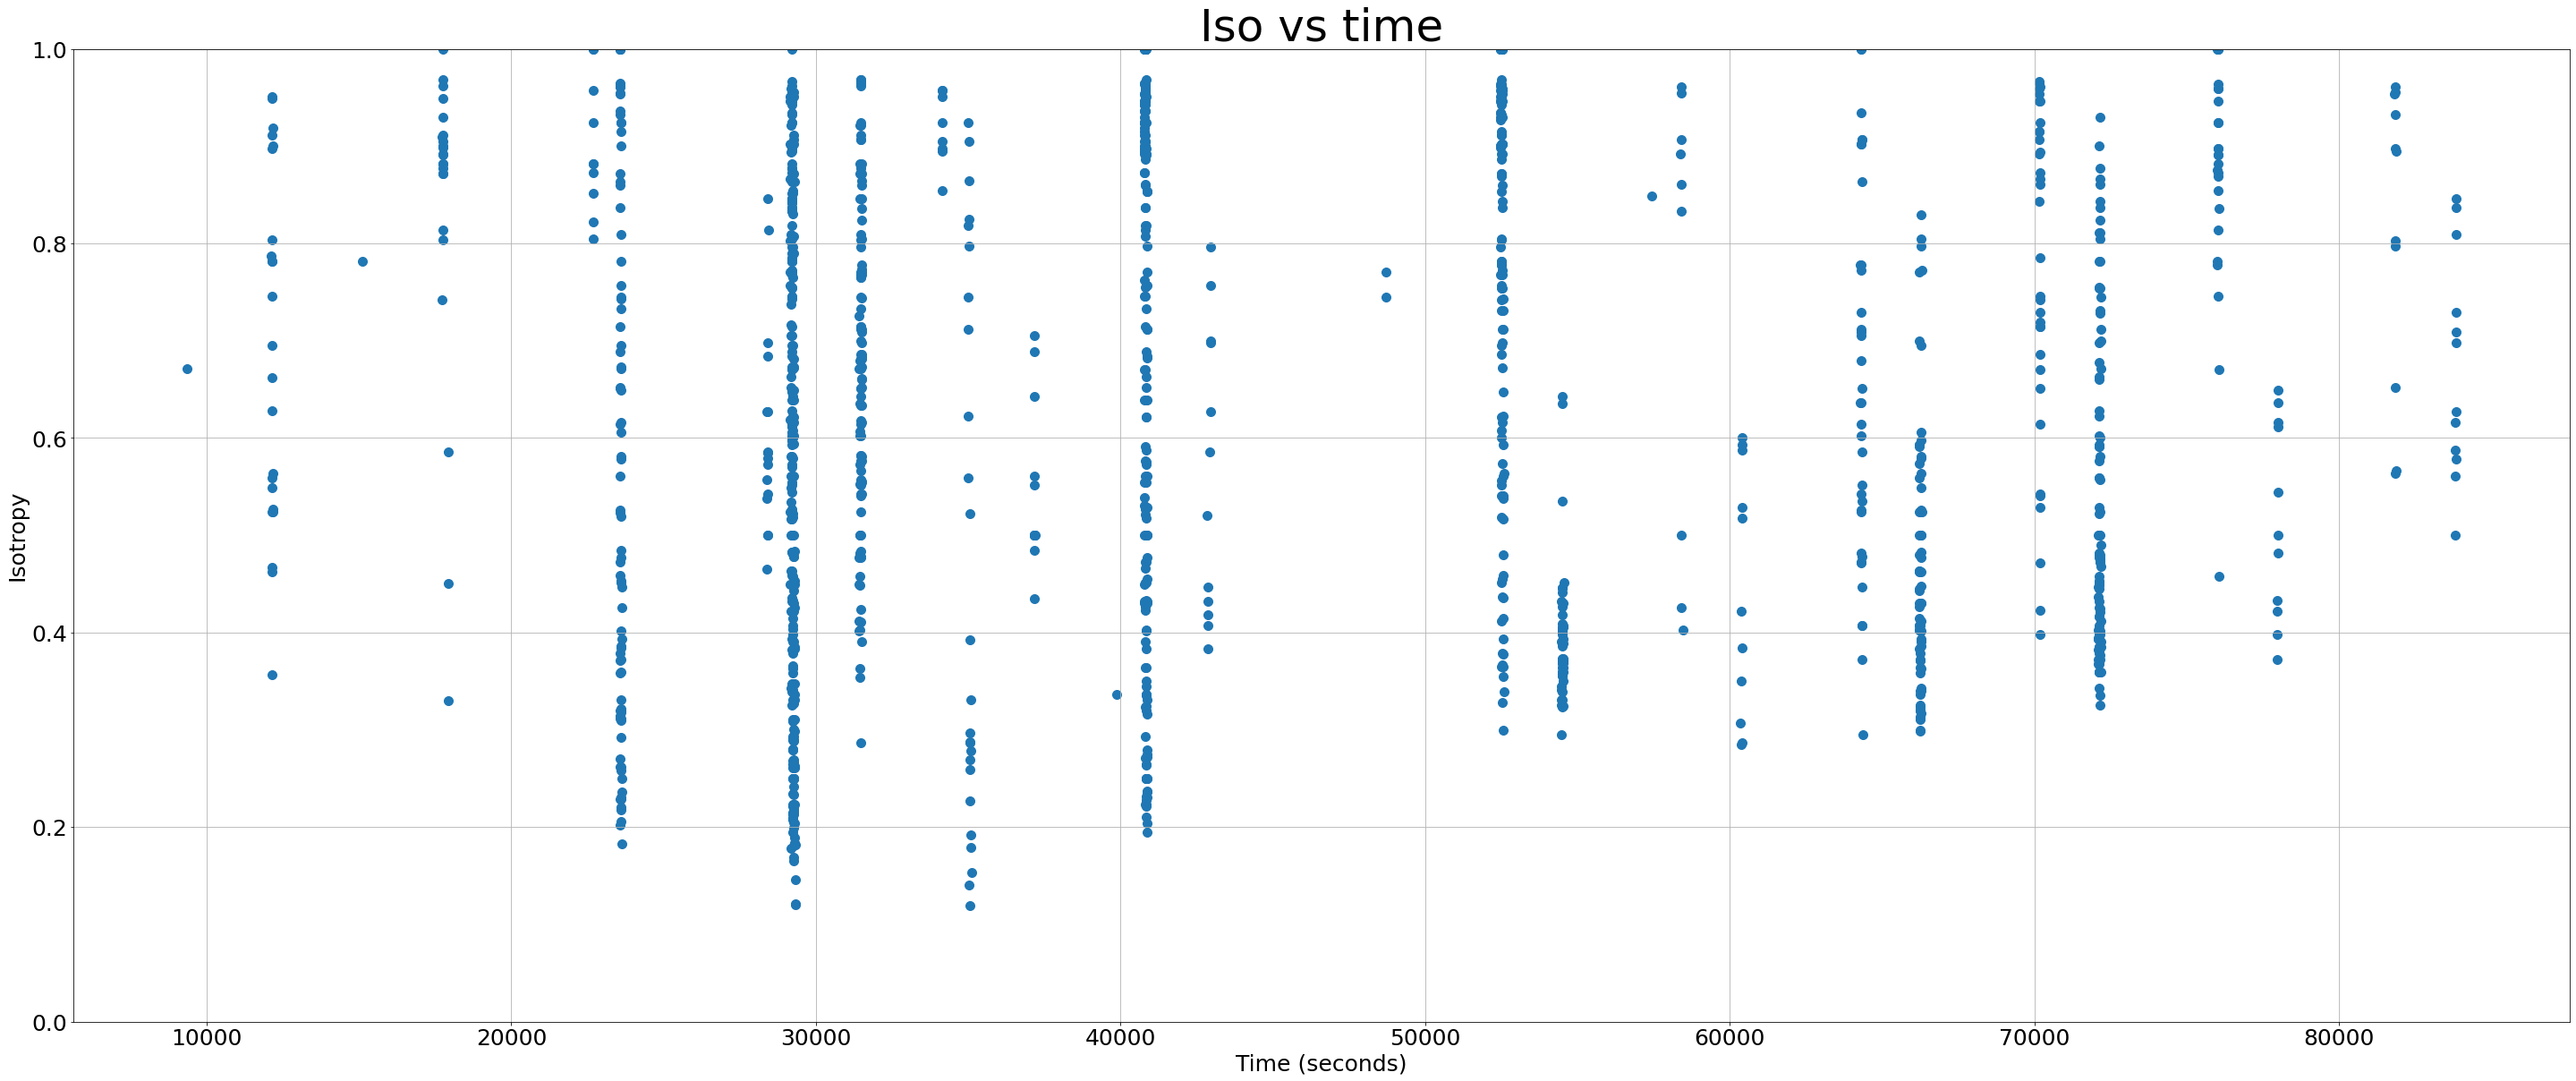

In [10]:
# isotropy plot
plt.figure(figsize = (50,20))
plt.title('Iso vs time', fontsize = 50)
plt.scatter(t_microburst, iso_indices_plot, s = 100)
plt.xlabel('Time (seconds)', fontsize = 25)
plt.ylabel('Isotropy', fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [11]:
mask = iso_indices == 0.5

In [12]:
print(t_microburst[mask])
print(r1_microburst[mask])
print(r4_microburst[mask])

[28412.3 28419.6 29194.4 29263.6 31441.5 31454.5 31464.  37163.6 37166.7
 37171.3 37178.7 37186.6 37190.  40778.5 40838.5 40848.3 40866.9 40881.6
 58409.9 66238.7 66286.5 66288.5 72104.4 72131.6 72137.  72167.  77992.8
 83815. ]
[  94  110  592 4224  204   78  472  244  528  392  196  228  156   98
 2112 3008 4992 5248  280 2880  408  624 2624 1824 1376  280   78   94]
[ 188  220  296 2112  408  156  944  488 1056  784  392  456  312   49
 1056 1504 2496 2624  140 5760  816 1248 5248 3648 2752  560  156  188]


In [13]:
# plot microburst magnitude vs time
#i = 400
#plotrange = 50000

#plt.figure(figsize = (20,15))
#plt.title('Microburst magnitude vs time', fontsize = 25)
#plt.semilogy(t_microburst, y_microburst, 'ko')
#plt.xlabel('Time (seconds)', fontsize = 20)
#plt.ylabel('count', fontsize = 20)
#plt.xticks(fontsize = 15)
#plt.yticks(fontsize = 15)
#plt.xlim(t_microburst[i]-plotrange, t_microburst[i]+plotrange)
#plt.grid(True)
#plt.show()